# Synthetic Data Experiments

These libraries below are only used to plot. Algorithm does not contain any external libraries for a fair comparison. You may want to install the following libraries for running the code manually:
> `numpy` `pandas` `matplotlib`, `pickle`

If you just want to check the plots, you can just look at the notebook as we already printed plots here.

#### Preparation

1. Load libraries we need

In [1]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
from matplotlib import rc
rc('text.latex', preamble=r'\usepackage[cm]{sfmath}')
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import time
import copy

/home/zed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


2. Define functions for plotting

In [2]:
def plotLineGraphSynthetic(ax, datasets, supportset, results, lim1, comment, lim2=7200, maxv=np.inf, lb=False):
    for dataset in datasets:
        ax = ax or plt.gca()
        supportToPlot = supportset
        dataUN = [results["Unnamed"][dataset+"1"][i][-2] if i in results["Unnamed"][dataset+"1"] else maxv for i in supportToPlot]
        dataSTIPA = [results["STIPA"][dataset+"1"][i][-2] if i in results["STIPA"][dataset+"1"] else maxv for i in supportToPlot]
        dataUN2 = [results["Unnamed"][dataset+"2"][i][-2] if i in results["Unnamed"][dataset+"2"] else maxv for i in supportToPlot]
        dataSTIPA2 = [results["STIPA"][dataset+"2"][i][-2] if i in results["STIPA"][dataset+"2"] else maxv for i in supportToPlot]
        
        if dataset == "highHlen":
            ax.plot(supportToPlot, dataSTIPA2, linewidth=1, color='brown',  label="STIPA-HSPAN300", marker='p')
            ax.plot(supportToPlot, dataSTIPA, linewidth=1, color='brown', linestyle=":",  label="STIPA-HSPAN200", marker='p')
            ax.plot(supportToPlot, dataUN2, linewidth=1, color='blue', label="Z-HSPAN300", marker='o')
            ax.plot(supportToPlot, dataUN, linewidth=1, color='blue', linestyle=":", label="Z-HSPAN200", marker='o')
            ax.set_title(comment+"HSPAN200/HSPAN300")
        if dataset == "highVlen":
            ax.plot(supportToPlot, dataSTIPA2, linewidth=1, color='brown',  label="STIPA-VSPAN300", marker='p')
            ax.plot(supportToPlot, dataSTIPA, linewidth=1, color='brown', linestyle=":",  label="STIPA-VSPAN200", marker='p')
            ax.plot(supportToPlot, dataUN2, linewidth=1, color='blue', label="Z-VSPAN300", marker='o')
            ax.plot(supportToPlot, dataUN, linewidth=1, color='blue', linestyle=":", label="Z-VSPAN200", marker='o')
            ax.set_title(comment+"VSPAN200/VSPAN300")
        if dataset == "highDen":
            ax.plot(supportToPlot, dataSTIPA2, linewidth=1, color='brown',  label="STIPA-DEN50", marker='p')
            ax.plot(supportToPlot, dataSTIPA, linewidth=1, color='brown', linestyle=":",  label="STIPA-DEN40", marker='p')
            ax.plot(supportToPlot, dataUN2, linewidth=1, color='blue', label="Z-DEN50", marker='o')
            ax.plot(supportToPlot, dataUN, linewidth=1, color='blue', linestyle=":", label="Z-DEN40", marker='o')
            ax.set_title(comment+"DEN40/DEN50")
            
        
        ax.set_xlabel("Minimum Support", labelpad=1)
        ax.set_ylabel("Time (seconds)", labelpad=1)
        ax.tick_params(axis='both', which='major', pad=1)
        #ax.set_title(dataset)
        ax.set_xticks(supportToPlot)
        #ax.legend()
        if lb == True:
            ax.legend(prop={'size': 8})
        ax.set_ylim((lim1, lim2))
        ax.set_xlim((supportset[0], supportset[-1]))
        ax.set_yscale("log")
        ax.grid(True, linestyle='dotted')
        return ax
    
def plotMemoryFootprint(ax, dataset, support, lb=False):
    MB = 1000000
    df1= pd.DataFrame(results_synthetic_footprint['Unnamed'][dataset][support])
    df2= pd.DataFrame(results_synthetic_footprint['KL'][dataset][support])
    df3= pd.DataFrame(results_synthetic_footprint['STIPA'][dataset][support])
    df4= pd.DataFrame(results_synthetic_footprint['HDFS'][dataset][support])
    df1['y'] = df1['y']/MB
    df2['y'] = df2['y']/MB
    df3['y'] = df3['y']/MB
    df4['y'] = df4['y']/MB
    if dataset == "highHlen1":
        ax.set_title("HSPAN200")
    if dataset == "highHlen2":
        ax.set_title("HSPAN300 / minSup = 0.2")
        ax.set_xticks([0,500,1000,1500,2000,2707])
    if dataset == "highVlen1":
        ax.set_title("VSPAN200 / minSup = 0.2")
        ax.set_xticks([0,500,1000,1500,2169])
    if dataset == "highVlen2":
        ax.set_title("VSPAN300")
    if dataset == "highDen1":
        ax.set_title("DEN40 / minSup = 0.4")
        ax.set_xticks([0,500,1000,1500,1760])
    if dataset == "highDen2":
        ax.set_title("DEN50")
        
    df4.plot(ax=ax, x='x', y='y', linewidth=1, color='green',  marker='v', label="HDFS", markersize=3)
    df2.plot(ax=ax, x='x', y='y', linewidth=1,  color='red',  marker='s', label="KarmaLegoD", markersize=3)
    df3.plot(ax=ax, x='x', y='y', linewidth=1, color='brown',  label="STIPA",  marker='p', markersize=3)
    df1.plot(ax=ax, x='x', y='y', linewidth=1, color='blue', label="Z-Miner", marker='o', markersize=3)
    if lb == True:
        ax.legend(prop={'size': 8})
    else:
        ax.get_legend().remove()
        
    ax.grid(True, linestyle='dotted')
    ax.tick_params(axis='both', which='major', pad=1)
    ax.set_xlabel("Number of Frequent Arrangements", labelpad=1)
    ax.set_ylabel("Memory Usage (MB)", labelpad=1)
    
    return ax

def plotLineGraphSyntheticTotalMemory(ax, datasets, supportset, results, comment, maxv=np.inf, lb=False):
    for dataset in datasets:
        ax = ax or plt.gca()
        supportToPlot = supportset
        MB = 1000000
        dataUN = [results["Unnamed"][dataset+"1"][i][-1]["y"]/MB if i in results["Unnamed"][dataset+"1"] else maxv for i in supportToPlot]
        dataSTIPA = [results["STIPA"][dataset+"1"][i][-1]["y"]/MB if i in results["STIPA"][dataset+"1"] else maxv for i in supportToPlot]
        dataUN2 = [results["Unnamed"][dataset+"2"][i][-1]["y"]/MB if i in results["Unnamed"][dataset+"2"] else maxv for i in supportToPlot]
        dataSTIPA2 = [results["STIPA"][dataset+"2"][i][-1]["y"]/MB if i in results["STIPA"][dataset+"2"] else maxv for i in supportToPlot]
        
        if dataset == "highHlen":
            ax.plot(supportToPlot, dataSTIPA2, linewidth=1, color='brown',marker='p',  label="STIPA-HSPAN300")
            ax.plot(supportToPlot, dataSTIPA, linewidth=1, color='brown',marker='p',  linestyle=":",  label="STIPA-HSPAN200")
            ax.plot(supportToPlot, dataUN2, linewidth=1, color='blue', marker='o', label="Z-HSPAN300")
            ax.plot(supportToPlot, dataUN, linewidth=1, color='blue', marker='o', linestyle=":", label="Z-HSPAN200")
            ax.set_ylim((0, 120))
            ax.set_title(comment+"HSPAN200/HSPAN300")
        if dataset == "highVlen":
            ax.plot(supportToPlot, dataSTIPA2, linewidth=1, color='brown', marker='p',  label="STIPA-VSPAN300")
            ax.plot(supportToPlot, dataSTIPA, linewidth=1, color='brown',marker='p',  linestyle=":",  label="STIPA-VSPAN200")
            ax.plot(supportToPlot, dataUN2, linewidth=1, color='blue', marker='o', label="Z-VSPAN300")
            ax.plot(supportToPlot, dataUN, linewidth=1, color='blue', marker='o', linestyle=":", label="Z-VSPAN200")
            ax.set_title(comment+"VSPAN200/VSPAN300")
            ax.set_ylim((0, 300))
        if dataset == "highDen":
            ax.plot(supportToPlot, dataSTIPA2, linewidth=1, color='brown', marker='p',  label="STIPA-DEN50")
            ax.plot(supportToPlot, dataSTIPA, linewidth=1, color='brown',marker='p',  linestyle=":",  label="STIPA-DEN40")
            ax.plot(supportToPlot, dataUN2, linewidth=1, color='blue',marker='o',  label="Z-DEN50")
            ax.plot(supportToPlot, dataUN, linewidth=1, color='blue',marker='o',  linestyle=":", label="Z-DEN40")
            ax.set_title(comment+"DEN40/DEN50")
            ax.set_ylim((0, 4500))
        
        ax.set_xlabel("Minimum Support", labelpad=1)
        ax.set_ylabel("Memory Usage (MB)", labelpad=1)
        ax.tick_params(axis='both', which='major', pad=1)
        #ax.set_title(dataset)
        ax.set_xticks(supportToPlot)
        #ax.legend(prop={'size': 8})
        if lb == True:
            ax.legend(prop={'size': 8})
        ax.set_xlim((supportset[0], supportset[-1]))
        #ax.set_yscale("log")
        ax.grid(True, linestyle='dotted')
        return ax

    
def plotLineGraphSynthetic2(ax, datasets, supportset, results, lim1, lim2=7200, maxv=np.inf, lb=False):
    for dataset in datasets:
        ax = ax or plt.gca()
        supportToPlot = supportset
        dataUN = [results["Unnamed"][dataset][i][-2] if i in results["Unnamed"][dataset] else maxv for i in supportToPlot]
        dataKL = [results["KL"][dataset][i][-2] if i in results["KL"][dataset] else maxv for i in supportToPlot]
        dataHDFS = [results["HDFS"][dataset][i][-2] if i in results["HDFS"][dataset] else maxv for i in supportToPlot]
        #dataTP = [results["TP"][dataset][i][-2] if i in results["TP"][dataset] else maxv for i in supportToPlot]
        dataSTIPA = [results["STIPA"][dataset][i][-2] if i in results["STIPA"][dataset] else maxv for i in supportToPlot]
        ax.plot(supportToPlot, dataHDFS, linewidth=1, color='green',  marker='v', label="HDFS")
        ax.plot(supportToPlot, dataKL, linewidth=1,  color='red',  marker='s', label="KarmaLegoD")
        ax.plot(supportToPlot, dataSTIPA, linewidth=1, color='brown',  label="STIPA",  marker='p')
        ax.plot(supportToPlot, dataUN, linewidth=1, color='blue', label="Z-Miner", marker='o')
        
        #ax.plot(supportToPlot, dataTP, linewidth=2, linestyle=":", color='grey',  label="TP")
        ax.set_xlabel("Minimum Support",  labelpad=1)
        ax.set_ylabel("Time (seconds)",  labelpad=1)
        if dataset == "highHlen1":
            ax.set_title("HSPAN200")
        if dataset == "highHlen2":
            ax.set_title("HSPAN300")
        if dataset == "highVlen1":
            ax.set_title("VSPAN200")
        if dataset == "highVlen2":
            ax.set_title("VSPAN300")
        if dataset == "highDen1":
            ax.set_title("DEN40")
        if dataset == "highDen2":
            ax.set_title("DEN50")
        ax.set_xticks(supportToPlot)
        if lb == True:
            ax.legend(prop={'size': 8})
        ax.set_ylim((lim1, lim2))
        ax.tick_params(axis='both', which='major', pad=1)
        ax.set_xlim((supportset[0], supportset[-1]))
        ax.set_yscale("log")
        ax.grid(True, linestyle='dotted')
        return ax
    
def plotLineGraphSyntheticTotalMemory2(ax, datasets, supportset, results, maxv=np.inf, lb=False):
    for dataset in datasets:
        ax = ax or plt.gca()
        supportToPlot = supportset
        MB = 1000000
        dataUN = [results["Unnamed"][dataset][i][-1]["y"]/MB  if i in results["Unnamed"][dataset] else maxv for i in supportToPlot]
        dataKL = [results["KL"][dataset][i][-1]["y"]/MB  if i in results["KL"][dataset] else maxv for i in supportToPlot]
        dataHDFS = [results["HDFS"][dataset][i][-1]["y"]/MB  if i in results["HDFS"][dataset] else maxv for i in supportToPlot]
        dataSTIPA = [results["STIPA"][dataset][i][-1]["y"]/MB  if i in results["STIPA"][dataset] else maxv for i in supportToPlot]
        ax.plot(supportToPlot, dataHDFS, linewidth=1, color='green',  marker='v', label="HDFS")
        ax.plot(supportToPlot, dataKL, linewidth=1,  color='red',  marker='s', label="KarmaLegoD")
        ax.plot(supportToPlot, dataSTIPA, linewidth=1, color='brown',  label="STIPA",  marker='p')
        ax.plot(supportToPlot, dataUN, linewidth=1, color='blue', label="Z-Miner", marker='o')
        
        if dataset == "highHlen1":
            ax.set_title("HSPAN200")
            ax.set_ylim((0, 175))
        if dataset == "highHlen2":
            ax.set_title("HSPAN300")
            ax.set_ylim((0, 175))
        if dataset == "highVlen1":
            ax.set_title("VSPAN200")
            ax.set_ylim((0, 300))
        if dataset == "highVlen2":
            ax.set_title("VSPAN300")
            ax.set_ylim((0, 400))
        if dataset == "highDen1":
            ax.set_title("DEN40")
            ax.set_ylim((0, 1200))
        if dataset == "highDen2":
            ax.set_title("DEN50")
            ax.set_ylim((0, 4000))
        
        ax.set_xlabel("Minimum Support", labelpad=1)
        ax.set_ylabel("Memory Usage (MB)", labelpad=1)
        ax.tick_params(axis='both', which='major', pad=1)
        ax.set_xticks(supportToPlot)
        #ax.legend(prop={'size': 8})
        if lb == True:
            ax.legend(prop={'size': 8})
        
        ax.set_xlim((supportset[0], supportset[-1]))
        #ax.set_yscale("log")
        ax.grid(True, linestyle='dotted')
        return ax

####  Experiment results

1. Load the results

These are the experiment results from the five algorithms (KarmaLegoD, HDFS, STIPA, TPMiner, and ZMiner)

In [3]:
results_synthetic = pickle.load(open("results_synthetic.p", "rb"))
print("THERE IS THE RESULT ALREADY CALCULATED")
results_synthetic_footprint = pickle.load(open("results_synthetic_footprint.p", "rb"))
print("THERE IS THE MEMORY RESULT ALREADY CALCULATED")    

THERE IS THE RESULT ALREADY CALCULATED
THERE IS THE MEMORY RESULT ALREADY CALCULATED


#### Synthetic memory and runtime experiment

This is the main synthetic data experiment we conducted. **Z-Miner** is more superior to STIPA when the dataset is more complicated. STIPA's growing of memory usage doubles **Z-Miner**'s growing when density is increased from 40 to 50.

1. Print the plots

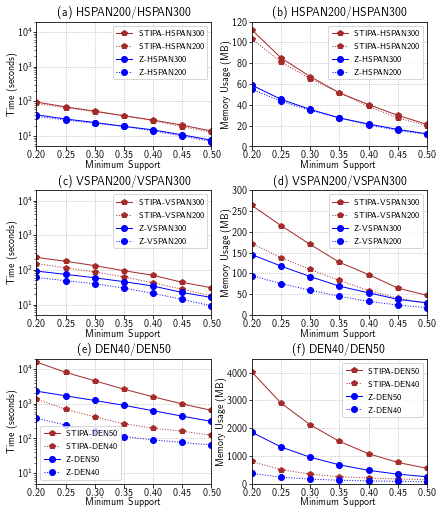

In [4]:
fig1, (axes) = plt.subplots(ncols=2, nrows=3, figsize=(7,8.5))
plt.subplots_adjust(hspace = 0.35, wspace=0.23)
plotLineGraphSynthetic(axes[0,0], ["highHlen"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic, 5, "(a) ", 20000, np.inf, True)
plotLineGraphSynthetic(axes[1,0], ["highVlen"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic, 5, "(c) ", 20000, np.inf, True)
plotLineGraphSynthetic(axes[2,0], ["highDen"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic, 5, "(e) ", 20000, np.inf, True)
plotLineGraphSyntheticTotalMemory(axes[0,1], ["highHlen"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic, "(b) ", np.inf, True)
plotLineGraphSyntheticTotalMemory(axes[1,1], ["highVlen"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic,  "(d) ",np.inf, True)
plotLineGraphSyntheticTotalMemory(axes[2,1], ["highDen"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic,  "(f) ",np.inf, True)

2. Save them into the file

In [5]:
fig1.savefig('syntheticDataExperiment_1.pdf', bbox_inches = "tight")

#### Synthetic memory and runtime experiment - for all datasets

Here we can check that **Z-Miner** is a clear winner among all algorithms.

1. Print the plots

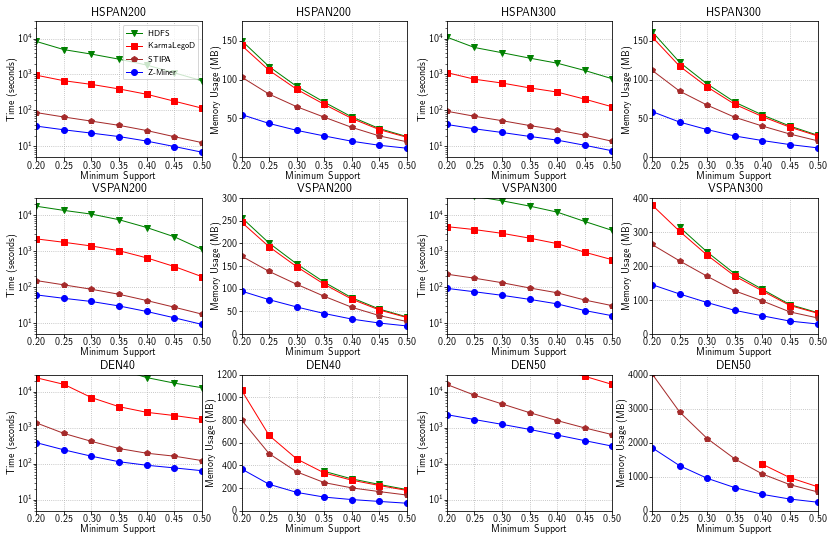

In [6]:
fig2, (axes) = plt.subplots(ncols=4, nrows=3, figsize=(14,9))
plt.subplots_adjust(hspace = 0.30, wspace=0.24)
plotLineGraphSynthetic2(axes[0,0], ["highHlen1"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic, 5, 30000, np.inf, True)
plotLineGraphSynthetic2(axes[0,2], ["highHlen2"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic, 5, 30000)
plotLineGraphSynthetic2(axes[1,0], ["highVlen1"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic, 5, 30000)
plotLineGraphSynthetic2(axes[1,2], ["highVlen2"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic, 5, 30000)
plotLineGraphSynthetic2(axes[2,0], ["highDen1"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic, 5, 30000)
plotLineGraphSynthetic2(axes[2,2], ["highDen2"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic, 5, 30000)
plotLineGraphSyntheticTotalMemory2(axes[0,1], ["highHlen1"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic)
plotLineGraphSyntheticTotalMemory2(axes[0,3], ["highHlen2"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic)
plotLineGraphSyntheticTotalMemory2(axes[1,1], ["highVlen1"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic)
plotLineGraphSyntheticTotalMemory2(axes[1,3], ["highVlen2"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic)
plotLineGraphSyntheticTotalMemory2(axes[2,1], ["highDen1"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic)
plotLineGraphSyntheticTotalMemory2(axes[2,3], ["highDen2"], [0.20,0.25,0.30,0.35,0.40,0.45,0.50], results_synthetic)

2. Save them into the file

In [7]:
fig2.savefig('syntheticDataExperiment_2.pdf', bbox_inches = "tight")

#### Memory footprint experiments

These are the memory footprint plots in terms of the total number of generated frequent arrangements while running each algorithms. **Z-Miner** shows a stable memory consumption footprint compared to others.

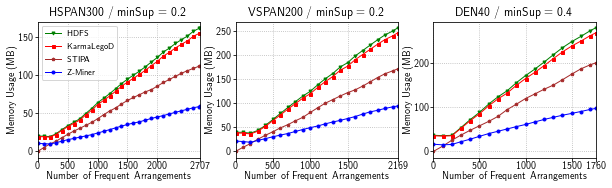

In [8]:
fig3, (axes) = plt.subplots(ncols=3, figsize=(10,2.5))
plt.subplots_adjust(wspace=0.22)
plotMemoryFootprint(axes[0], "highHlen2", 0.20, True)
plotMemoryFootprint(axes[1], "highVlen1", 0.20)
plotMemoryFootprint(axes[2], "highDen1", 0.40)

In [9]:
fig3.savefig('syntheticDataExperiment_3.pdf', bbox_inches = "tight")